<a href="https://colab.research.google.com/github/JavierJ002/KagglePractica/blob/main/HousingBrazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

#Librerías necesarias
import pandas as pd #libreria de lectura de doc, matemática etc...
import numpy as np #Librería de algebra, y clave del data Science
import seaborn as sns # Una de las muchas  librerias para gráficos(con la que tengo familiaridad)
import scipy.stats as stats #Liberia de estadística
from matplotlib import pyplot as plt
import plotly.express as px #Gráficos
import warnings # Para quitar las advertencias de descontinuación de x metodos de algunas librerías

#Librerias de Machine Learnning
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from statsmodels.formula.api import ols


#Librerías para detectar patrones de datos faltantes
import missingno as msno

#Librerías para probar el accuracy de los modelos
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error #métricas para evaluar modelos

#PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA







Mounted at /content/drive


In [2]:

pd.set_option("display.max_rows", None, "display.max_columns", None) # Enseñar todas las colm del doc
#Lectura de los archivos
houses = pd.read_csv('/content/drive/MyDrive/Experiencia/DataCleanning/houses_to_rent_v2.csv')
houses.head()
#HOA es el valor a pagar por tarifa de comunidad


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [3]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [4]:
houses.floor.value_counts() # No se puede dejar '-' se debe cambiar con 0


-      2461
1      1081
2       985
3       931
4       748
5       600
6       539
7       497
8       490
9       369
10      357
11      303
12      257
13      200
14      170
15      147
16      109
17       96
18       75
19       53
20       44
21       42
25       25
23       25
22       24
26       20
24       19
27        8
28        6
29        5
32        2
35        1
46        1
301       1
51        1
Name: floor, dtype: int64

In [5]:
houses.floor = houses['floor'].replace('-', '0')
houses.floor = houses.floor.astype('int64')
houses.floor.value_counts()

0      2461
1      1081
2       985
3       931
4       748
5       600
6       539
7       497
8       490
9       369
10      357
11      303
12      257
13      200
14      170
15      147
16      109
17       96
18       75
19       53
20       44
21       42
25       25
23       25
22       24
26       20
24       19
27        8
28        6
29        5
32        2
35        1
46        1
301       1
51        1
Name: floor, dtype: int64

In [6]:
houses.nunique() #Devolver los valores diferentes (sin valores iguales) permite identificar las variables categóricas


city                      5
area                    517
rooms                    11
bathroom                 10
parking spaces           11
floor                    35
animal                    2
furniture                 2
hoa (R$)               1679
rent amount (R$)       1195
property tax (R$)      1243
fire insurance (R$)     216
total (R$)             5751
dtype: int64

In [7]:
houses.city.value_counts() # Estas son las ciudades en la cual se estudian los precios de Renta en Brazil

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64

In [8]:
houses.describe()#Devuelve las medidas de disperción de las variables numéricas

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,5.067995,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,6.069050,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,3.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,8.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,301.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


# Cosas Extrañas encontradas


* Hay casas que cuentan con 11 espacios de estacionamiento (raro a primera vista)
*   En  las casas existen 35 categorías de pisos, me imagino que serán apartamentos que se encuentran en edidicios.
*   Casas con 10 baños
*    Casas con 301 pisos
*   Property Tax más caro que la renta más cara...
*   Un máximo gigantesco en el área






Se estudiara más a fondo con fin de ver si se pueden explicar alguno de los enunciados anteriores







In [9]:


filtro = houses['rent amount (R$)'] == 0
posibles_missing = houses['rent amount (R$)'][filtro]
cantidad_cumplen_condicion = filtro.sum()
print("Cantidad de valores que cumplen la condición:", cantidad_cumplen_condicion)

filtro2 = houses['total (R$)'] == 0
posibles_missing = houses['total (R$)'][filtro2]
cantidad_cumplen_condicion = filtro.sum() +  filtro2.sum()
print("Cantidad de valores que cumplen la condición:", cantidad_cumplen_condicion)

#No hay valores perdidos en la data con respecto a estas dos variables



Cantidad de valores que cumplen la condición: 0
Cantidad de valores que cumplen la condición: 0


**Estudio de las distribuciones**

In [10]:
houses.select_dtypes(include=np.number).apply(lambda x: x.skew())

area                   69.596804
rooms                   0.702391
bathroom                1.213810
parking spaces          1.487534
floor                  11.816997
hoa (R$)               69.039381
rent amount (R$)        1.838877
property tax (R$)      96.013594
fire insurance (R$)     1.970400
total (R$)             58.960803
dtype: float64

**Comprobación de datos atípicos**
Toda variable arriba de +-3 es que contiene valores extremos que pueden ser considerados atípicos, viendo las gráficas podemos confirmar la teoría.

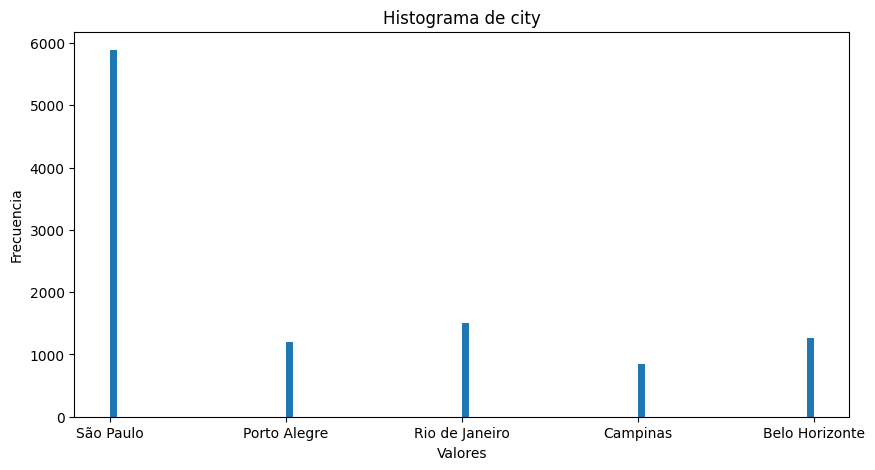

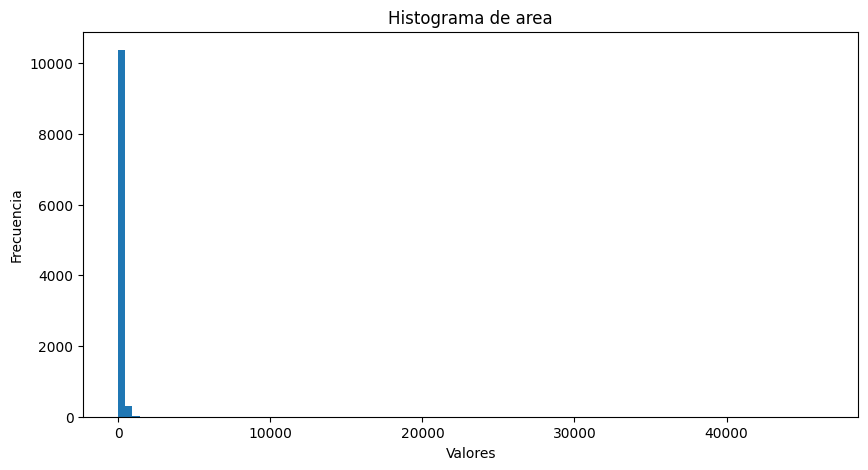

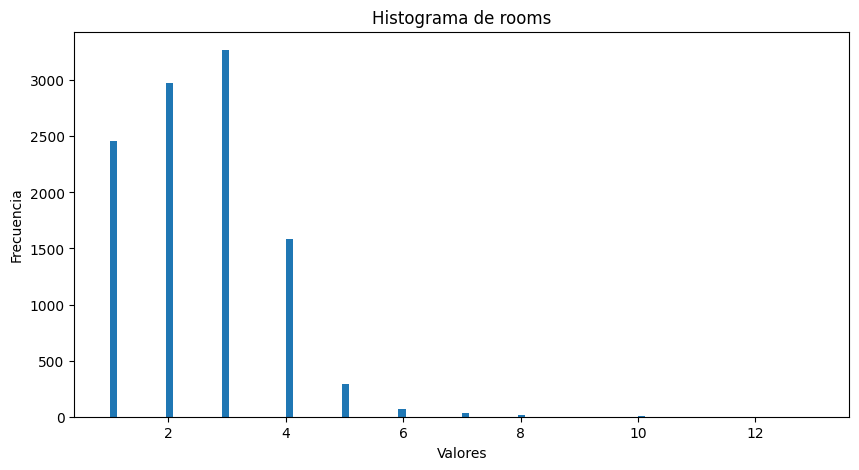

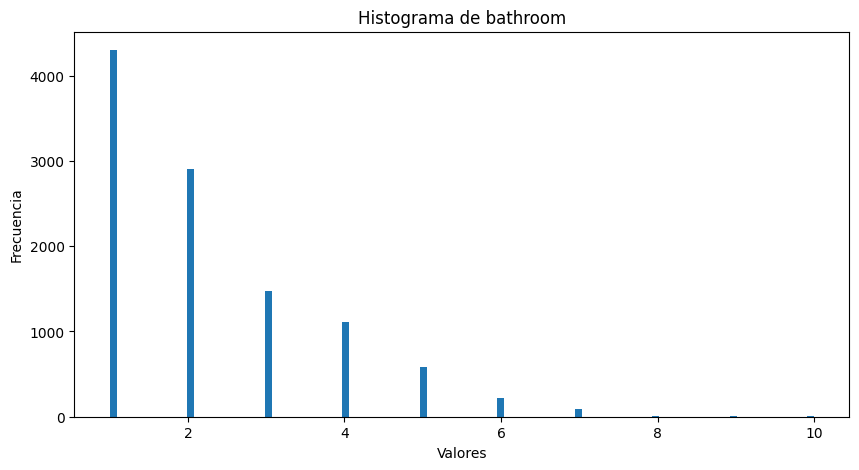

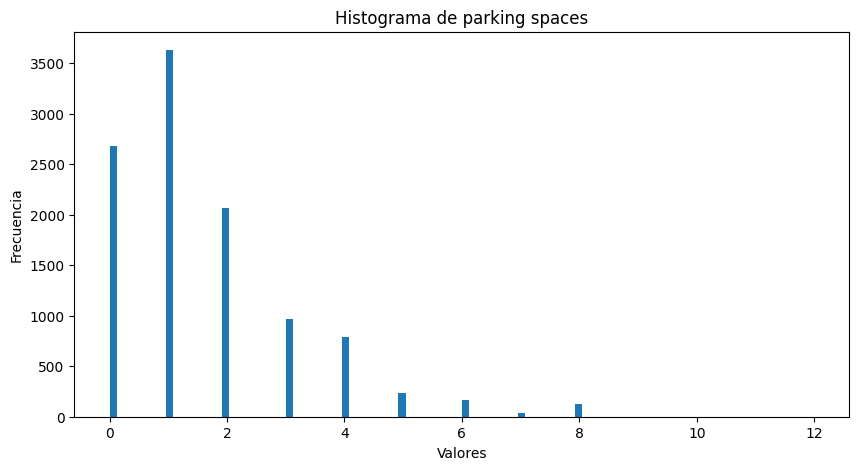

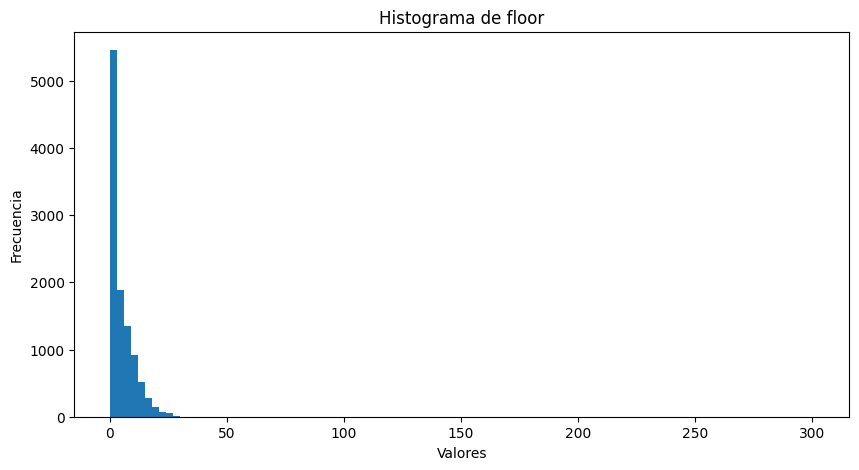

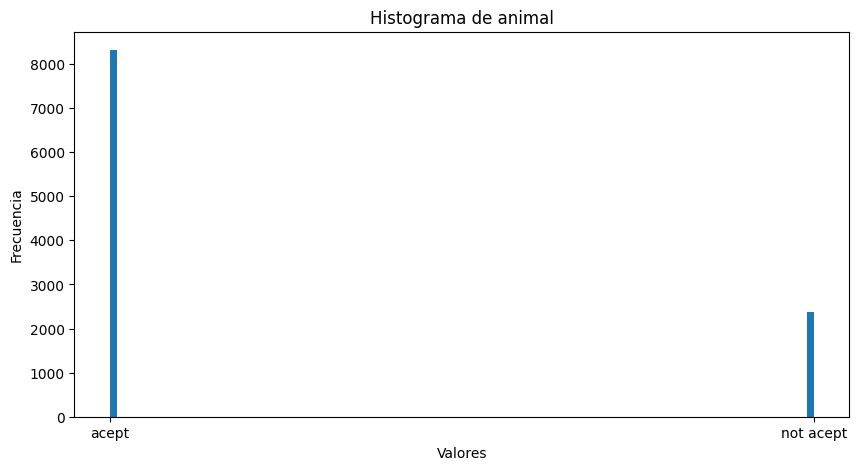

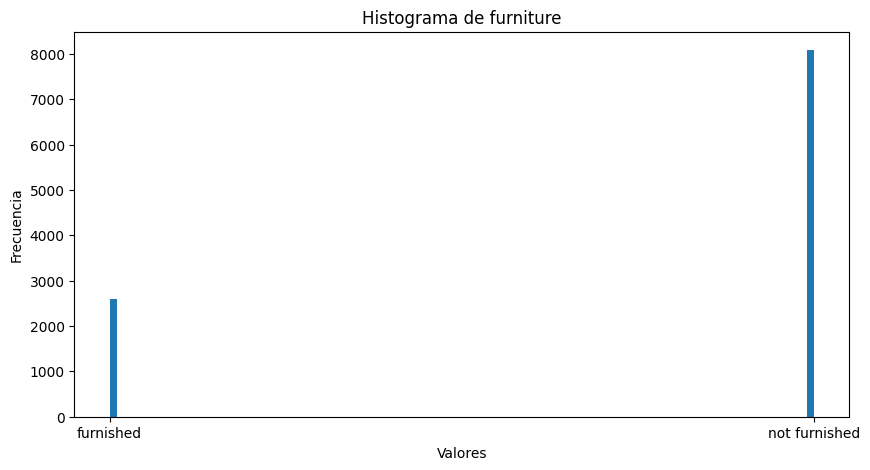

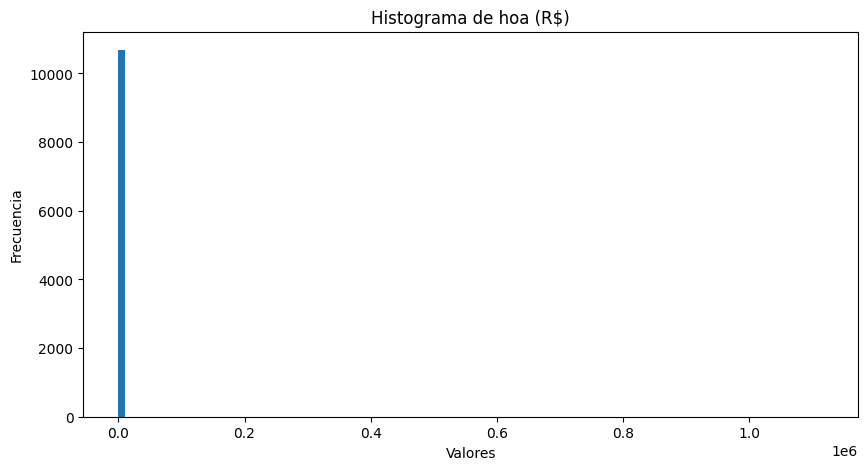

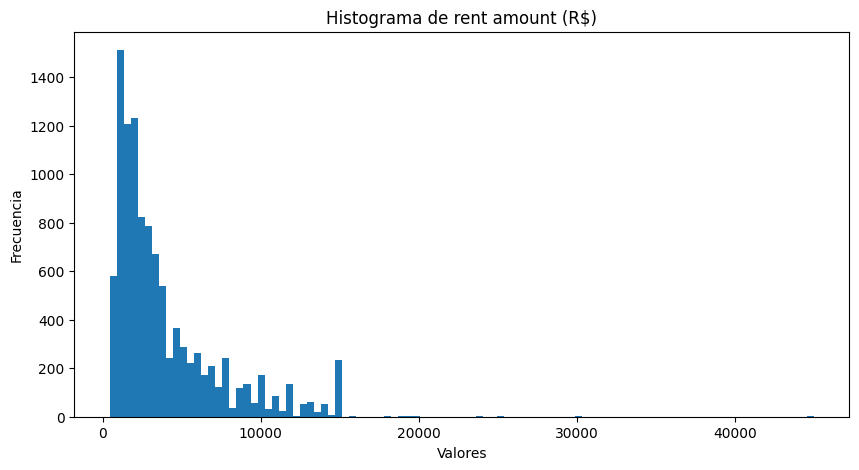

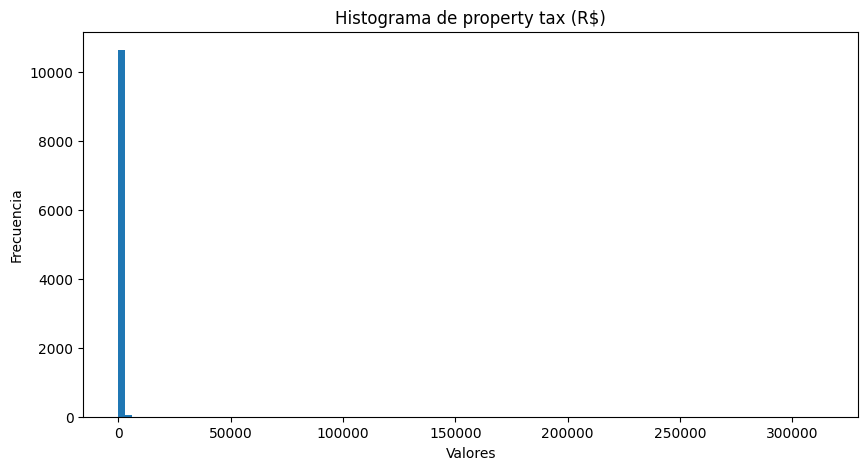

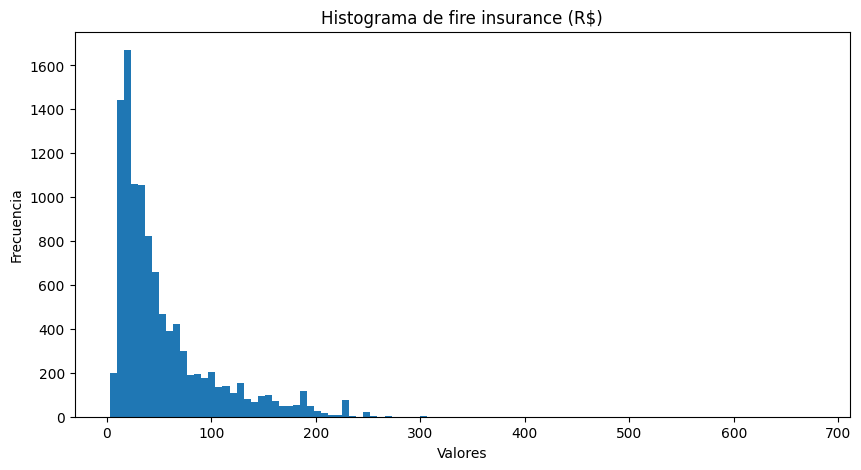

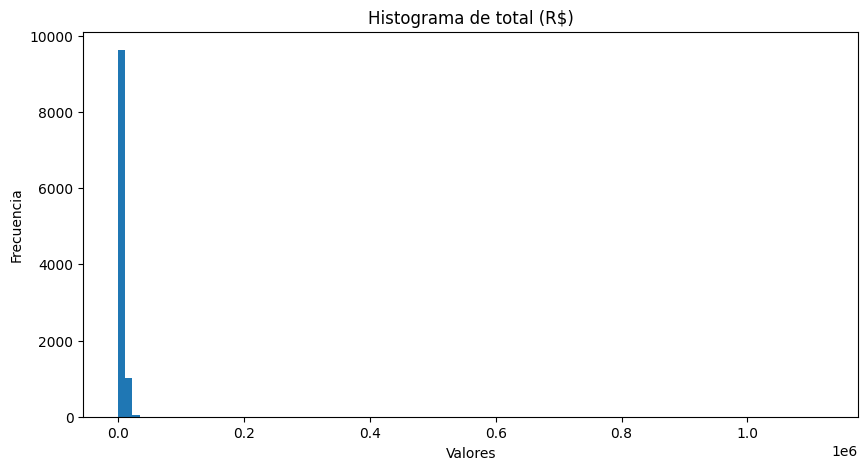

In [11]:
figsize = (10, 5)  # Ajusta el tamaño de la figura aquí (X, Y)


columnas = houses.columns  # Obtén una lista de todas las columnas en el DataFrame

for columna in columnas:
    plt.figure(figsize=figsize)
    plt.hist(houses[columna], bins=100)  # Ajusta 'bins' según tus datos
    plt.title(f'Histograma de {columna}')
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')
    plt.show()

**Destacado en las gráficas**
Se encontraron valores muy muy extremos que hacen que las gráficas que afectan a la media y representación de los datos en las variables.

Se encontró estos errores en:
*   Área
*   floor
*    Las variables de dinero

**Soluciones posibles para este problematexto en negrita**

1.   Votar los datos outlier de estas variables: En este caso no creo que sea correcto, ya que puede ser perfectamente posible que una casa tenga valores altos (mansiones).
2.   Aplicar Winsor: Colapsar los datos  a los límites superiores así conservando la integridad de los datos, ya que los valores que pasen se ubicarán en la cola de la distribución pero mucho mas cercanos.
3. Convertir en NA: Esto con el fin de hacer imputaciones a los datos mediante el uso de árboles de desiciones.




Luego hay variables categóricas que tienen grupos muy poco representados como son:

*   floor
*   bathroom
*   parking spots
*   bedrooms













# Detección de Outliers


In [12]:
'''Esta funcion tiene 3 diferentes usos, los cuales son:
Check: Se encarga de devolver en %la cantidad de outliers por columna
winsor: Aplicará la funcion winsorize with pandas que se encarga de colapsar los valores a las colas de la distribución
miss: Se encargará de convertir en Na todos los valores atípicos
'''
'''Esta funcion se encarga de colapsar la data según los límites en base a quartiles 25% data'''

def winsorize_with_pandas(s, limits):
    '''Esta funcion se encarga de colapsar la data según los límites en base a quartiles 25% data'''
    return s.clip(lower=s.quantile(limits[0], interpolation='lower'),
                  upper=s.quantile(1-limits[1], interpolation='higher'))



def gestiona_outliers(col,clas = 'check'):
     print(col.name)
     # Condición de asimetría y aplicación de criterio 1 según el caso
     if abs(col.skew()) < 1:
        criterio1 = abs((col-col.mean())/col.std())>3
     else:
        criterio1 = abs((col-col.median())/col.mad())>8

     # Calcular primer cuartil
     q1 = col.quantile(0.25)
     # Calcular tercer cuartil
     q3 = col.quantile(0.75)
     # Calculo de IQR
     IQR=q3-q1
     # Calcular criterio 2 (general para cualquier asimetría)
     criterio2 = (col<(q1 - 3*IQR))|(col>(q3 + 3*IQR))
     lower = col[criterio1&criterio2&(col<q1)].count()/col.dropna().count()
     upper = col[criterio1&criterio2&(col>q3)].count()/col.dropna().count()
     # Salida según el tipo deseado
     if clas == 'check':
            return(lower*100,upper*100,(lower+upper)*100)
     elif clas == 'winsor':
            return(winsorize_with_pandas(col,(lower,upper)))
     elif clas == 'miss':
            print('\n MissingAntes: ' + str(col.isna().sum()))
            col.loc[criterio1&criterio2] = np.nan
            print('MissingDespues: ' + str(col.isna().sum()) +'\n')
            return(col)



Debido a que ninguna métrica de detección de outliers es 100% exacta, utilizamos dos metricas para asegurarnos que los valores que se identifiquen como  atípicos sean correctos.
Las métricas utilizadas fueron:
1.   Rango Intercuartilico: dividiendo la información en 4 con el 25% de los datos, se definen 2 límites, uno superior y otro inferior, los cuales se calculan con la siguientes formulas:
Limite inferior: q1 - 3 * IQR
Límite superior: q3 + 3 * IQR

2.  Criterio del MAD: el código compara el Z-score basado en MAD con 8. Esto significa que se están identificando valores que están a más de 8 veces la desviación de la mediana absoluta (MAD) de la mediana. En caso de sobrepasar 3 desv estandar o 8 desviaciones absolutas de la mediana es considerado valor atípico.

In [13]:
warnings.filterwarnings("ignore", category=FutureWarning) #Comentar estas lineas después de haber observado los datos
warnings.filterwarnings("ignore", category=UserWarning)
houses.select_dtypes(include=np.number).copy().apply(lambda x: gestiona_outliers(x, clas = 'check'))




area
rooms
bathroom
parking spaces
floor
hoa (R$)
rent amount (R$)
property tax (R$)
fire insurance (R$)
total (R$)


,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.215114,0.486345,0.0,0.009353,0.028058,0.112233,0.037411,0.607931,0.037411,0.06547
2,0.215114,0.486345,0.0,0.009353,0.028058,0.112233,0.037411,0.607931,0.037411,0.06547


**¿Qué son los outputs?**

El primero  es la cantidad de outliers en la cola izquierda de  la distribucion como pueden ser valores negativos o valores super pequeños (errores de propagación).

El segundo registro  es el porcentaje de outliers encontrados en la cola derecha de la distribución, como valores máximos u otro tipo de población (como mansiones).

La tercera tupla no es mas que la suma del primero y el segundo

# Visualización de valores Atípicos


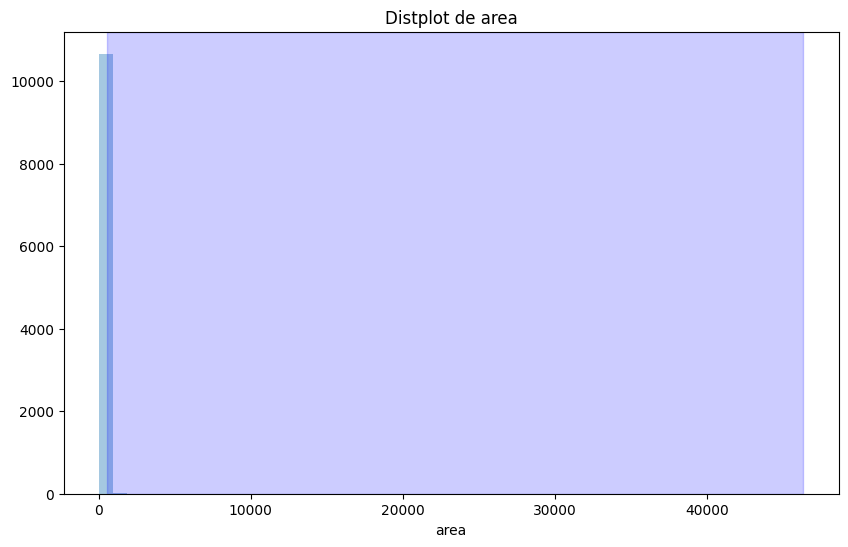

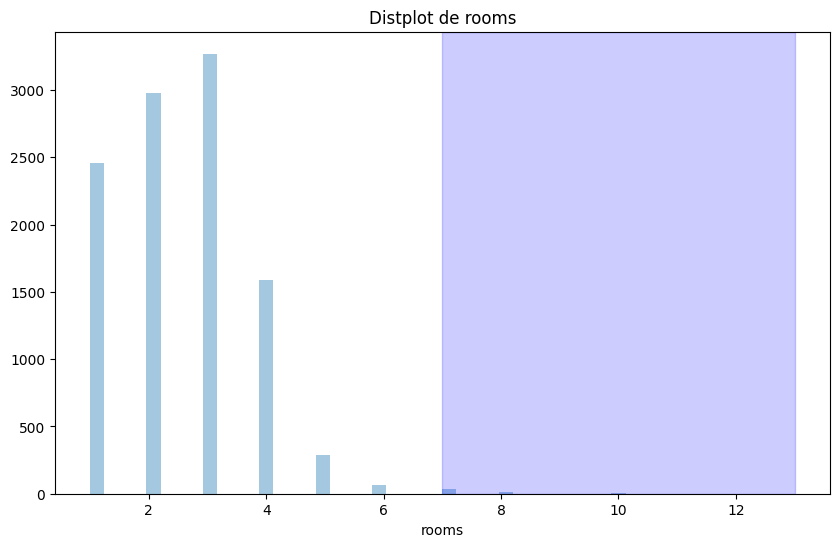

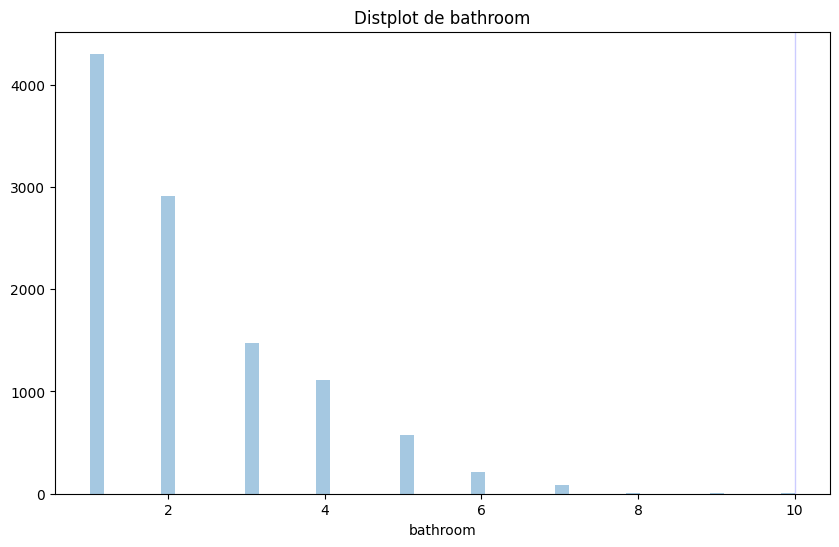

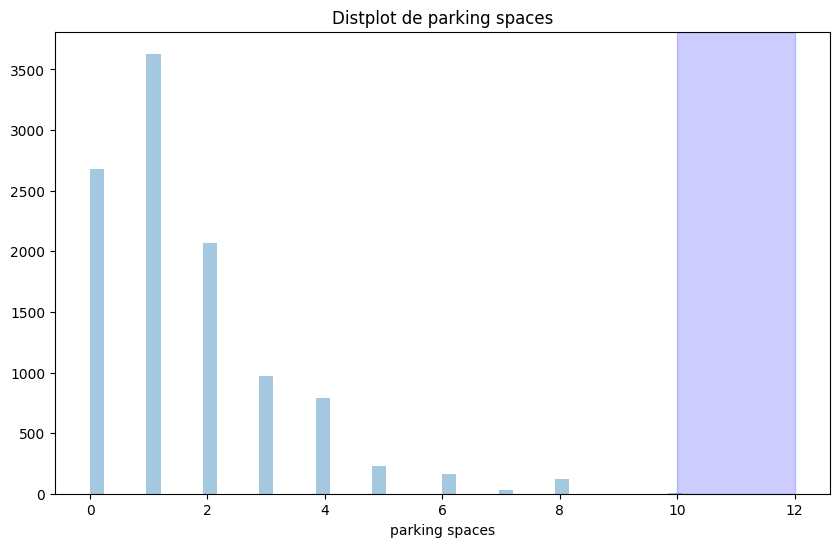

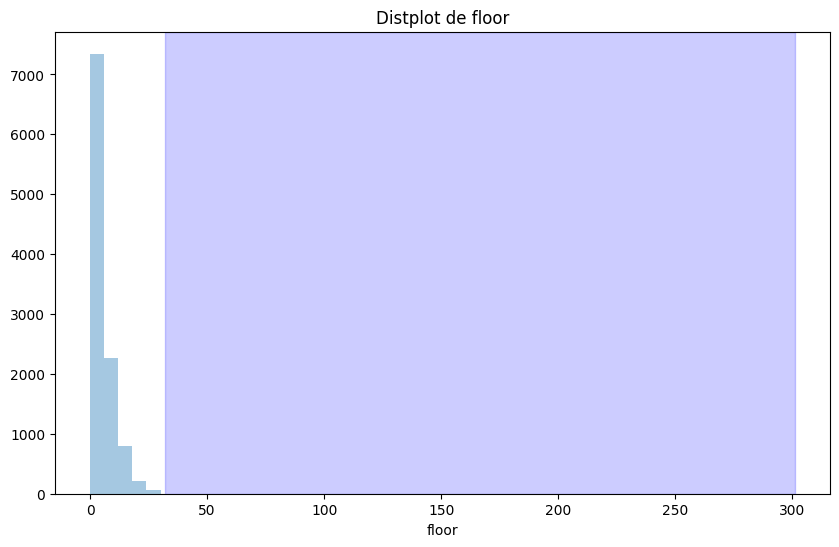

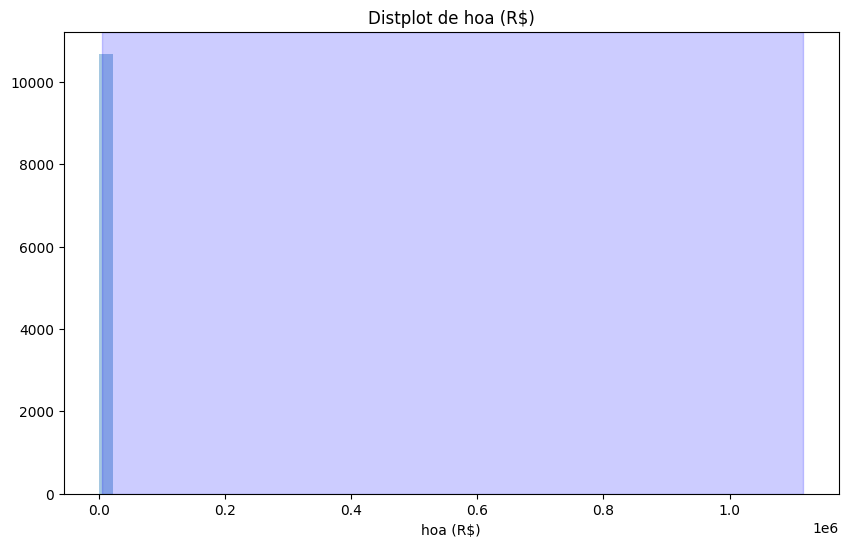

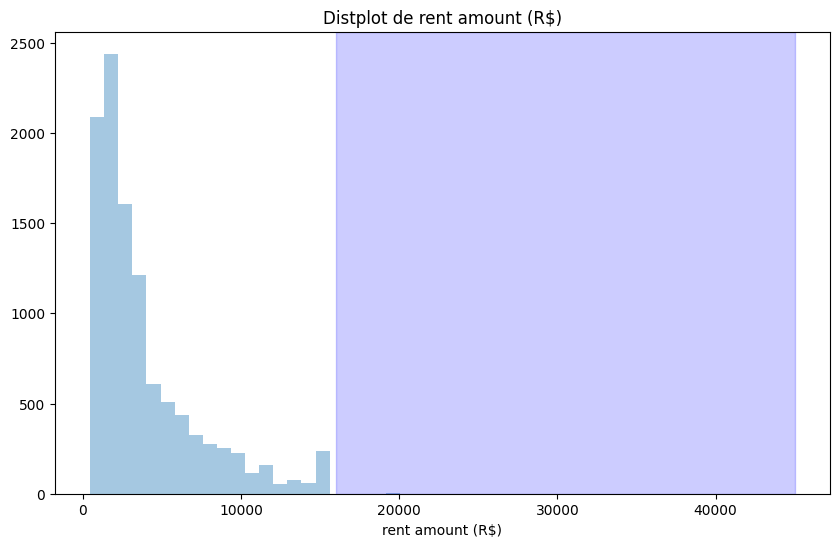

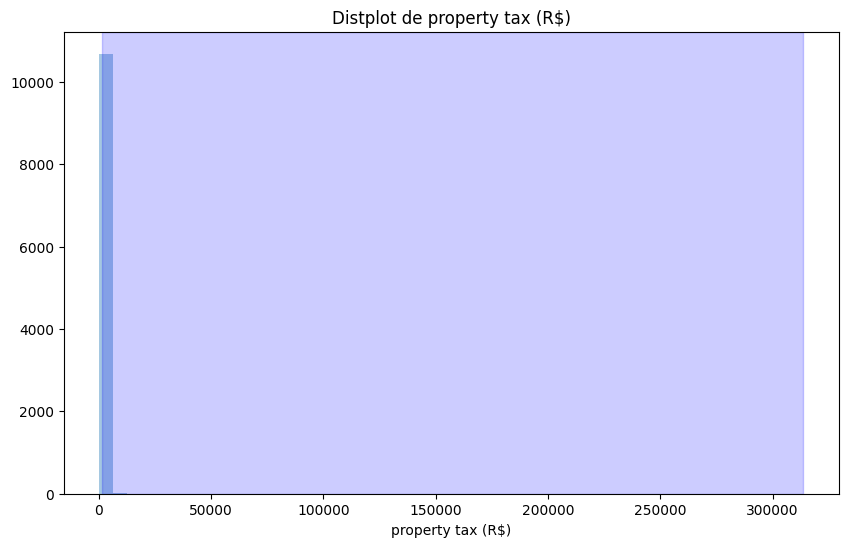

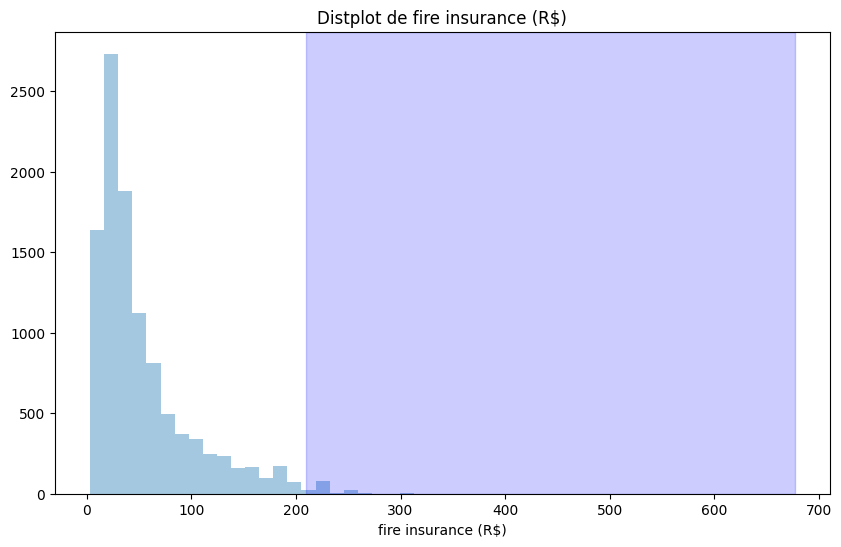

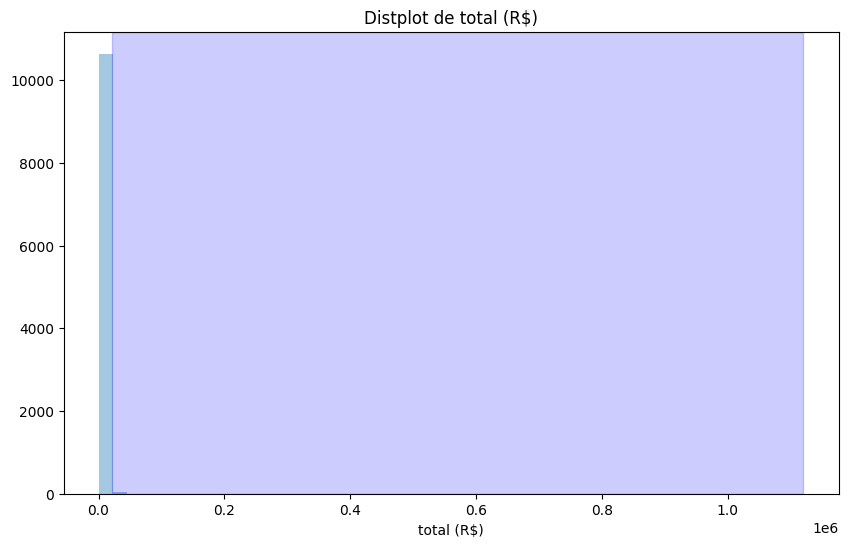

In [14]:
warnings.filterwarnings("ignore", category=FutureWarning) #Comentar estas lineas después de haber observado los datos
warnings.filterwarnings("ignore", category=UserWarning) #Esta también

for col_name in houses.select_dtypes(include=np.number).columns:
    col_data = houses[col_name]

    # Calcular los valores de los criterios
    criterio1 = abs((col_data - col_data.mean()) / col_data.std()) > 3 if abs(col_data.skew()) < 1 else abs((col_data - col_data.median()) / col_data.mad()) > 8
    q1 = col_data.quantile(0.25)
    q3 = col_data.quantile(0.75)
    IQR = q3 - q1
    criterio2 = (col_data < q1 - 3 * IQR) | (col_data > q3 + 3 * IQR)

    # Crear el distplot con Seaborn y resaltar los outliers por criterio
    plt.figure(figsize=(10, 6))
    sns.distplot(col_data, kde=False)

    # Resaltar los outliers identificados por criterio1 en rojo


    # Resaltar los outliers identificados por criterio2 en azul
    plt.axvspan(xmin=col_data[criterio2].min(), xmax=col_data[criterio2].max(), alpha=0.2, color='blue') # Se esta definiendo el primer outlier y el segundo

    plt.title(f'Distplot de {col_name}')
    plt.show()


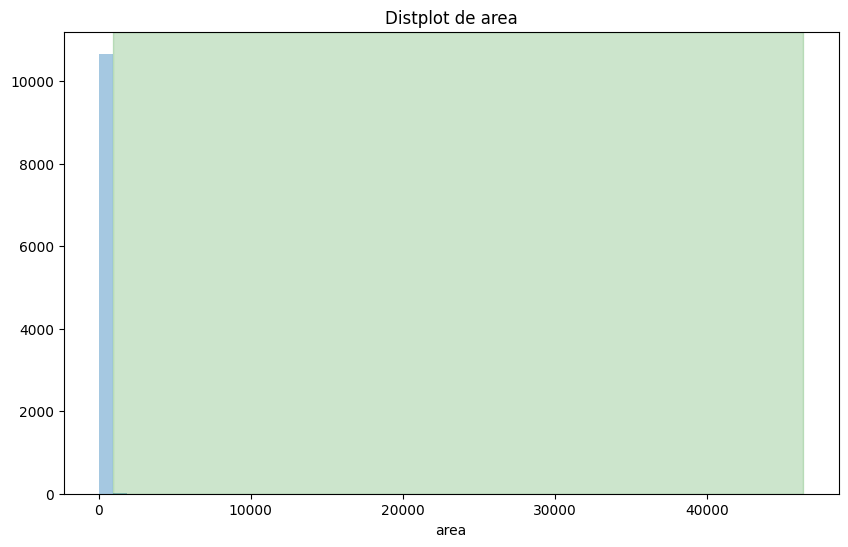

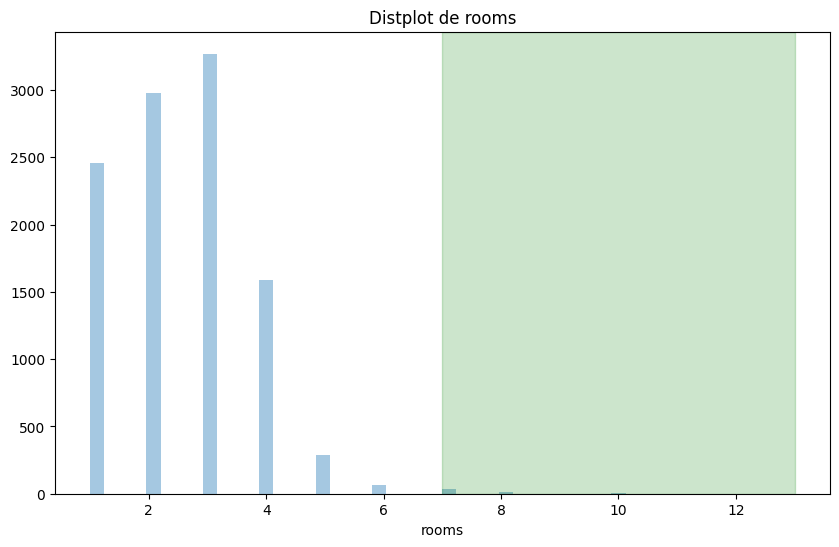

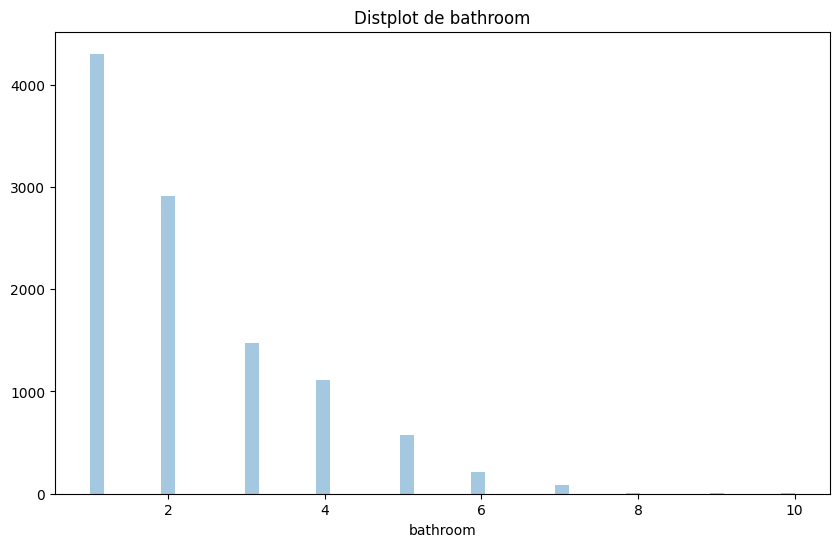

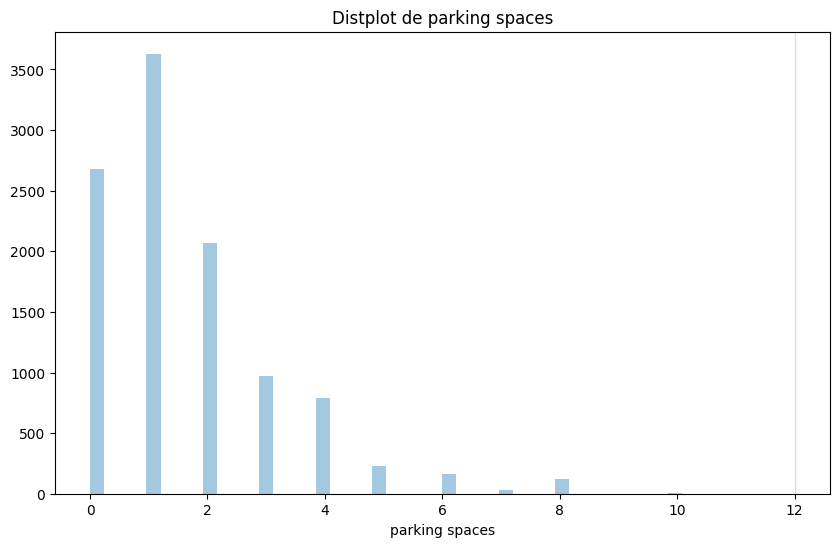

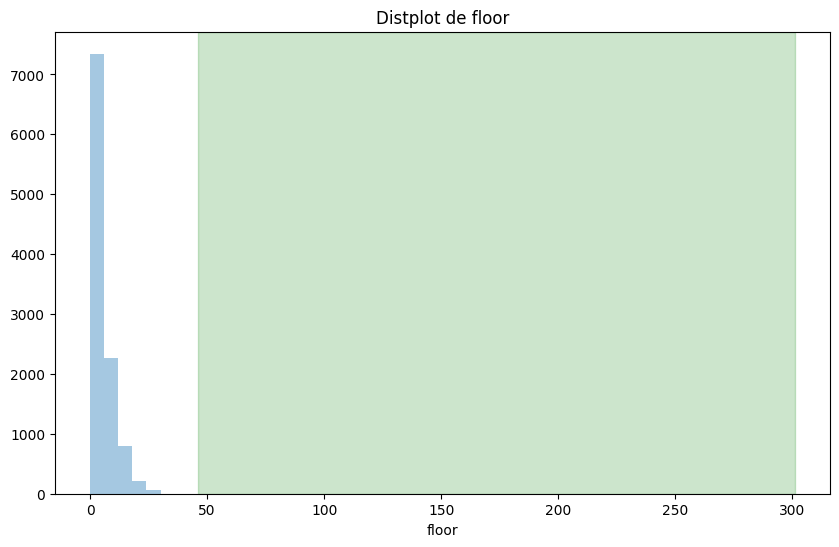

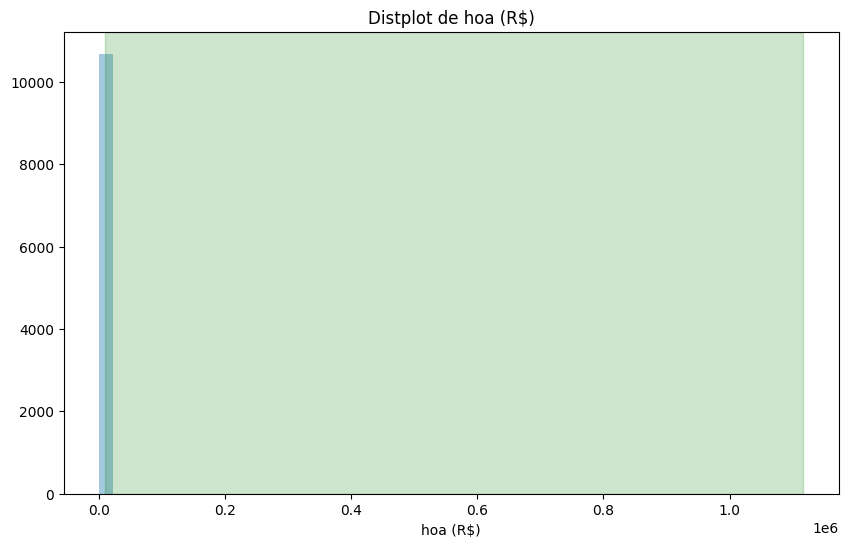

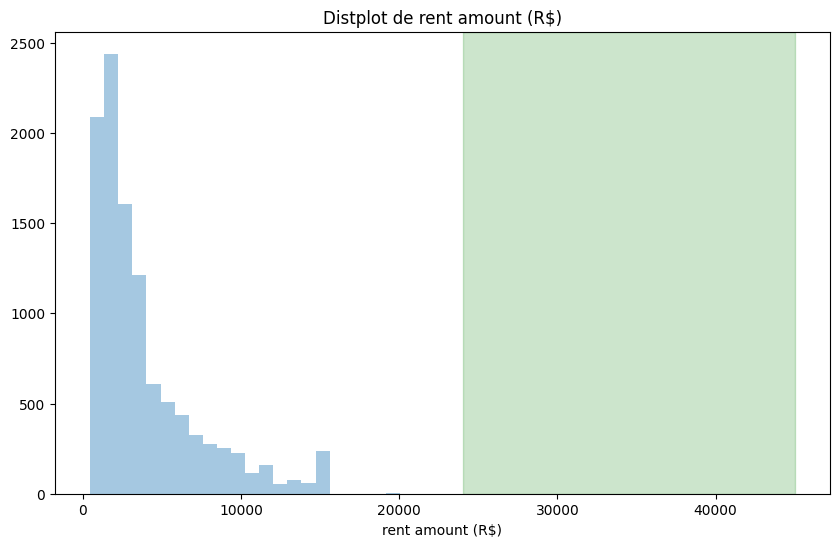

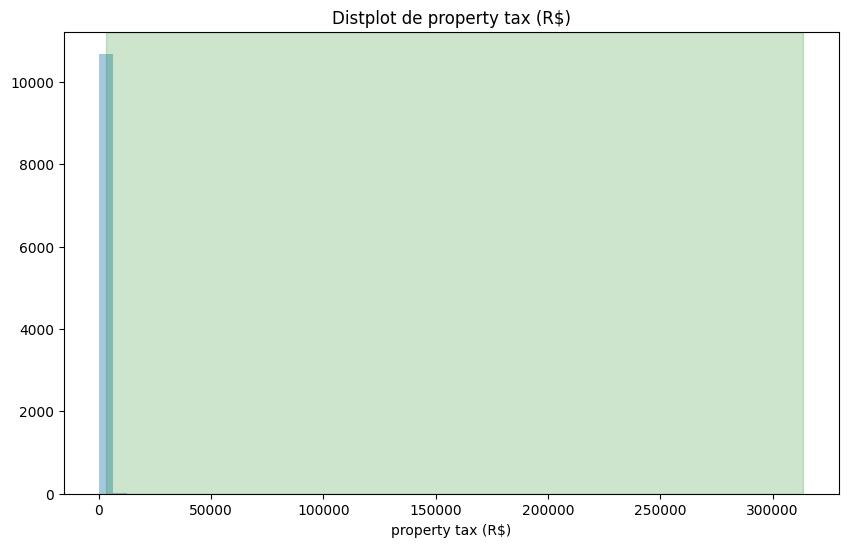

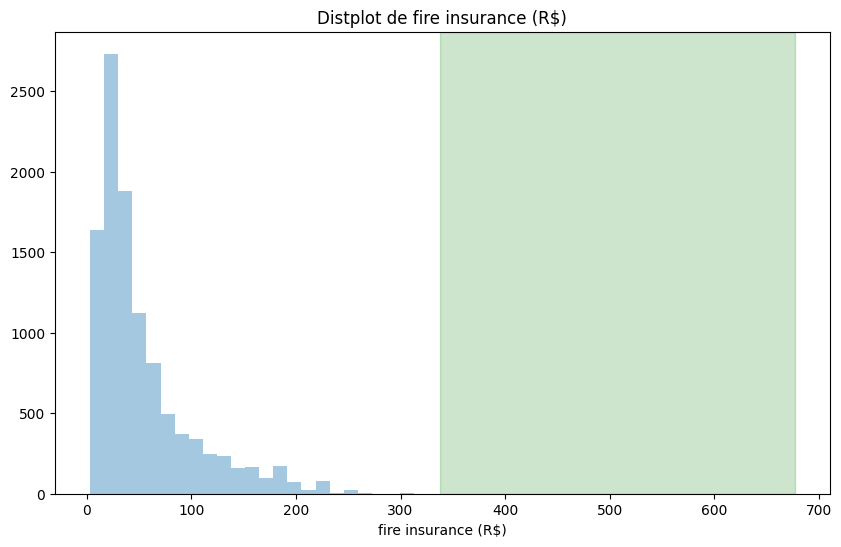

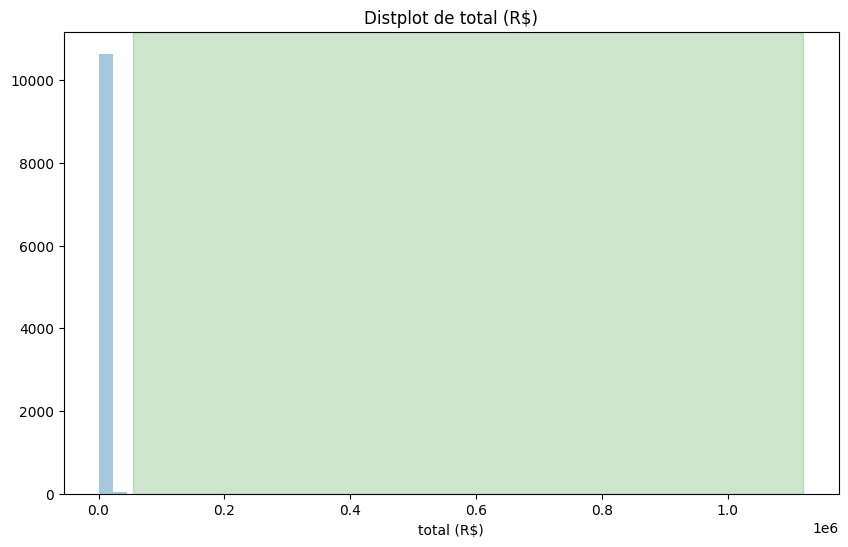

In [15]:

for col_name in houses.select_dtypes(include=np.number).columns:
    col_data = houses[col_name]

    # Calcular los valores de los criterios
    criterio1 = abs((col_data - col_data.mean()) / col_data.std()) > 3 if abs(col_data.skew()) < 1 else abs((col_data - col_data.median()) / col_data.mad()) > 8
    q1 = col_data.quantile(0.25)
    q3 = col_data.quantile(0.75)
    IQR = q3 - q1
    criterio2 = (col_data < q1 - 3 * IQR) | (col_data > q3 + 3 * IQR)

    # Crear el distplot con Seaborn y resaltar los outliers por criterio
    plt.figure(figsize=(10, 6))
    sns.distplot(col_data, kde=False)

    # Resaltar los outliers identificados por criterio1 en rojo
    plt.axvspan(xmin=col_data[criterio1].min(), xmax=col_data[criterio1].max(), alpha=0.2, color='green') #Estos son todos los atipicos identificados por el criterio 1 (MAD)

    # Resaltar los outliers identificados por criterio2 en azul


    plt.title(f'Distplot de {col_name}')
    plt.show()

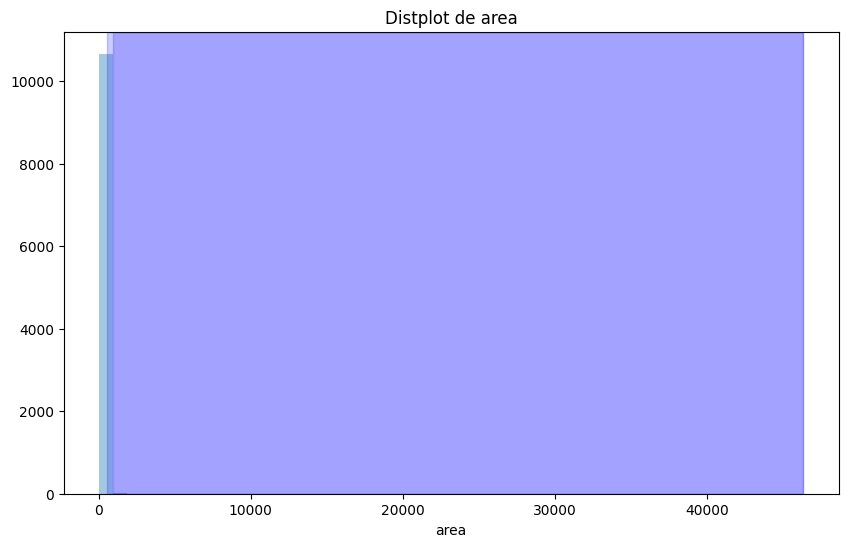

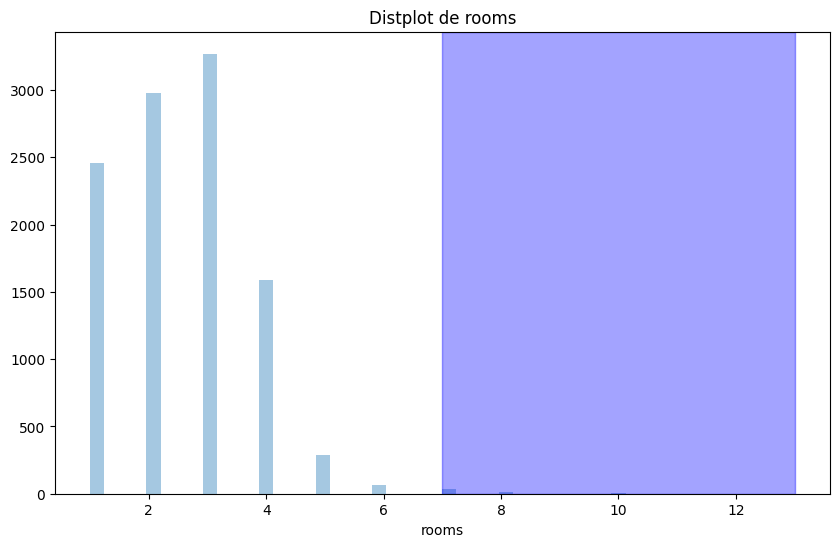

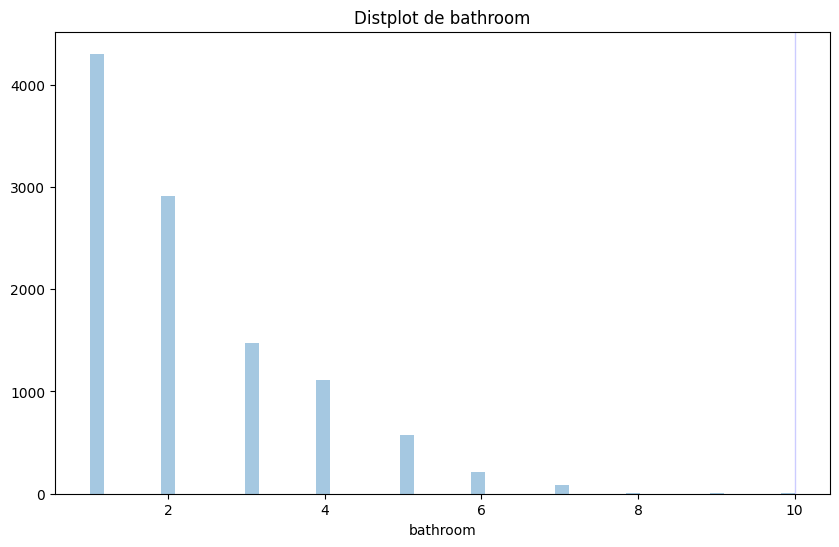

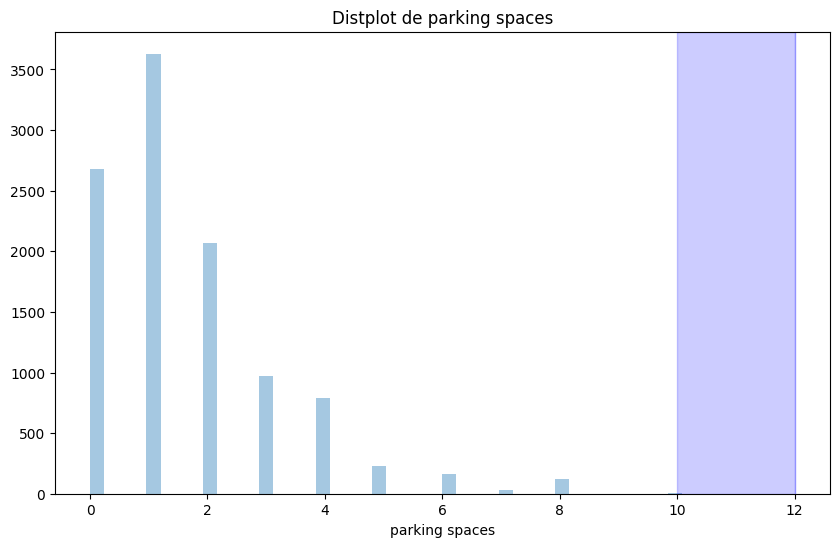

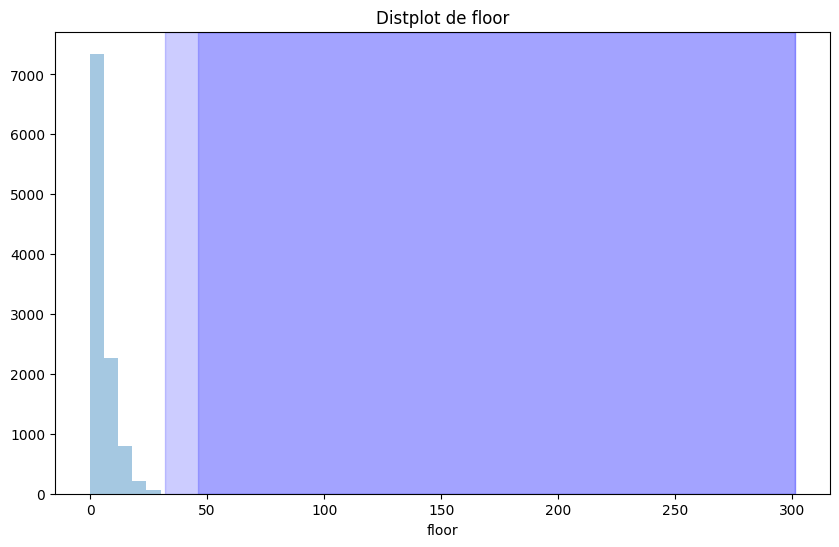

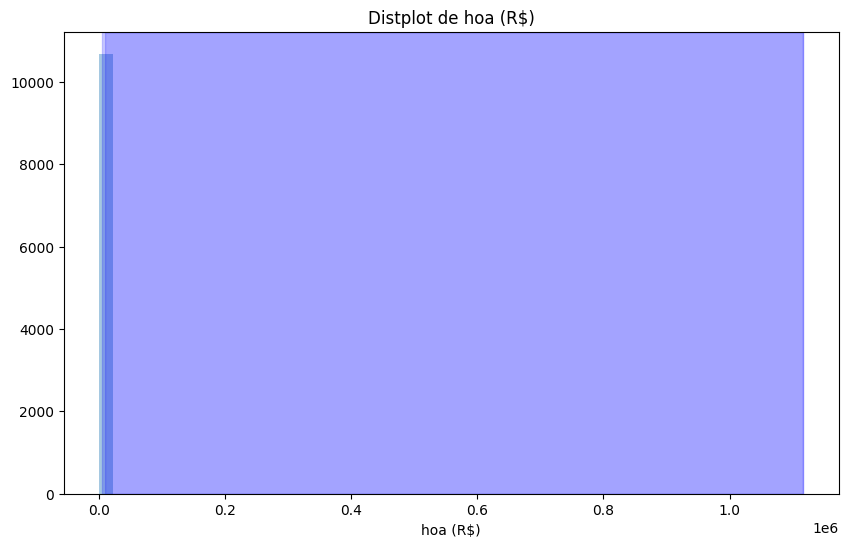

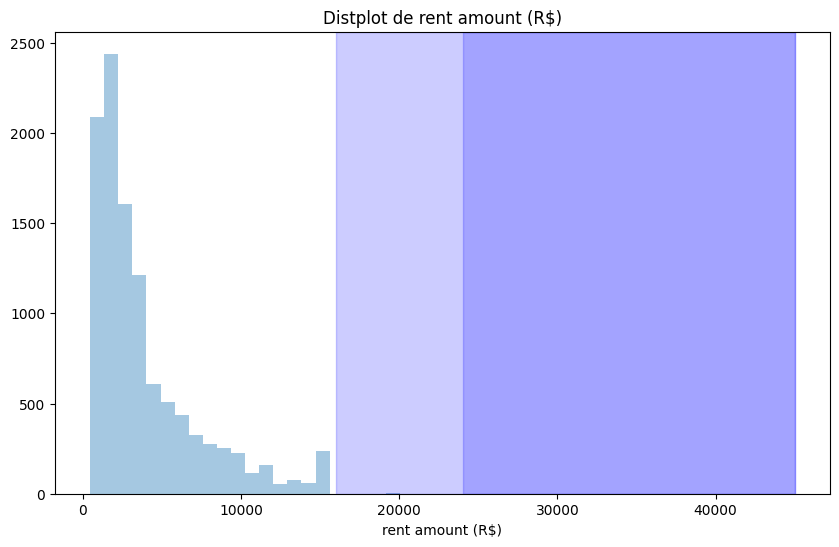

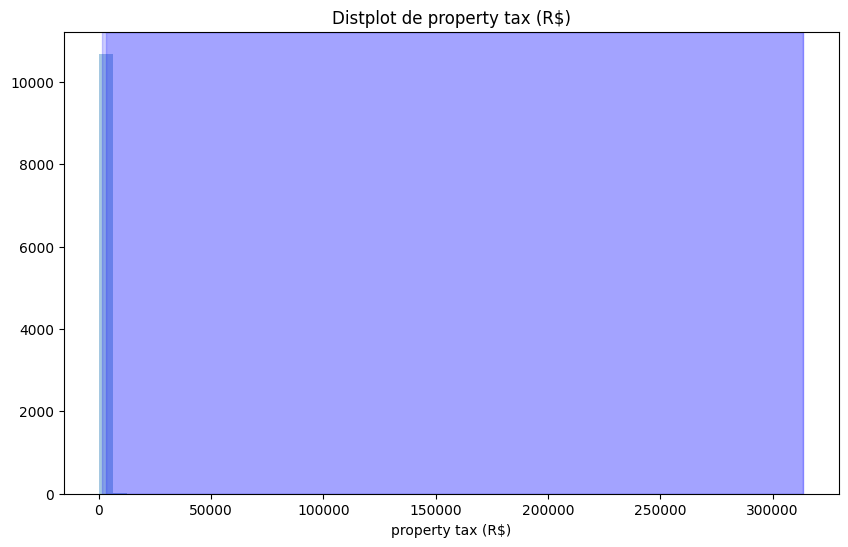

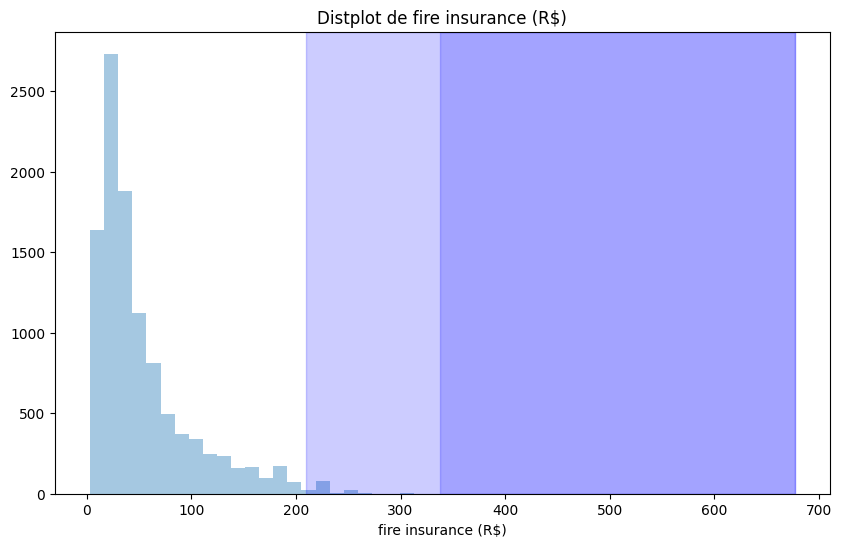

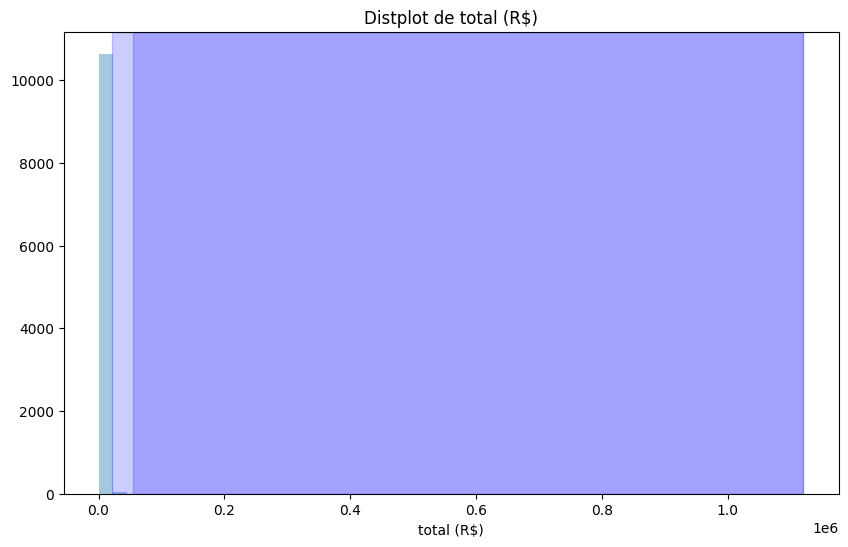

In [16]:

warnings.filterwarnings("ignore", category=FutureWarning) #Comentar estas lineas después de haber observado los datos
warnings.filterwarnings("ignore", category=UserWarning) #Esta también

for col_name in houses.select_dtypes(include=np.number).columns:
    col_data = houses[col_name]

    # Calcular los valores de los criterios
    criterio1 = abs((col_data - col_data.mean()) / col_data.std()) > 3 if abs(col_data.skew()) < 1 else abs((col_data - col_data.median()) / col_data.mad()) > 8
    q1 = col_data.quantile(0.25)
    q3 = col_data.quantile(0.75)
    IQR = q3 - q1
    criterio2 = (col_data < q1 - 3 * IQR) | (col_data > q3 + 3 * IQR)

    # Crear el distplot con Seaborn y resaltar los outliers por criterio
    plt.figure(figsize=(10, 6))
    sns.distplot(col_data, kde=False)

    # Resaltar los outliers identificados por criterio1 en rojo


    # Resaltar los outliers identificados por criterio2 en azul
    plt.axvspan(xmin=col_data[criterio1].min(), xmax=col_data[criterio1].max(), alpha=0.2, color='blue') # S
    plt.axvspan(xmin=col_data[criterio2].min(), xmax=col_data[criterio2].max(), alpha=0.2, color='blue') #

    plt.title(f'Distplot de {col_name}')
    plt.show()

**Solo las areas en donde los dos se interceptan son calificados como atípicos**
El area vacía no dice nada solo nos importa el area pintada por los dos criterios que está por encima de la barra de frecuencia, si no hay barra de frecuencia no hay datos por lo que está vacía (el areá se extiende mucho porque hay datos extremos que se extienden por muchas desviaciones estandares).

# ¿Qué hacer con los valores outlier?


1.   Winzorize
2.   Convertir en Na para después Imputar
3.   Nada: En caso de haber muchos valores atípicos, dejan de ser tan 'raros' por lo que se dice que se esta trabajando con una segunda población, en este caso yo creo que debe ser porque es una mezcla de casas y apartamentos.



#Convertir a NA?

In [17]:
housesNA =houses.select_dtypes(include=np.number).copy().apply(lambda x: gestiona_outliers(x, clas = 'miss'))
housesNA.apply(lambda x: x.isna().sum()/x.count()*100)


area

 MissingAntes: 0
MissingDespues: 23

rooms

 MissingAntes: 0
MissingDespues: 52

bathroom

 MissingAntes: 0
MissingDespues: 0

parking spaces

 MissingAntes: 0
MissingDespues: 1

floor

 MissingAntes: 0
MissingDespues: 3

hoa (R$)

 MissingAntes: 0
MissingDespues: 12

rent amount (R$)

 MissingAntes: 0
MissingDespues: 4

property tax (R$)

 MissingAntes: 0
MissingDespues: 65

fire insurance (R$)

 MissingAntes: 0
MissingDespues: 4

total (R$)

 MissingAntes: 0
MissingDespues: 7



area                   0.215578
rooms                  0.488722
bathroom               0.000000
parking spaces         0.009354
floor                  0.028066
hoa (R$)               0.112360
rent amount (R$)       0.037425
property tax (R$)      0.611650
fire insurance (R$)    0.037425
total (R$)             0.065512
dtype: float64

**Resultados**
Los resultados obtenidos son muy buenos ya que nos dice que tenemos pocos missing (Los valores en decimales ya estan multiplicados por 100 si vemos la fórmula propuesta). También podemos observar que el total de missingDespués ninguno pasa de 100 y eso que contabamos con más de 10k datos.

Al ser tan pocos outliers, se puede imputar la data con o borrar los datos ya que se pierde muy poco tamaño muestral.



In [18]:
housesNA = housesNA.join(houses.select_dtypes(exclude=np.number))
housesNA = housesNA.dropna() #Eliminando todos los NA ya que son poquisimos
housesNA.to_csv('BrazilianHousesNA.csv', index=False)
housesNA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10542 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   area                 10542 non-null  float64
 1   rooms                10542 non-null  float64
 2   bathroom             10542 non-null  float64
 3   parking spaces       10542 non-null  float64
 4   floor                10542 non-null  float64
 5   hoa (R$)             10542 non-null  float64
 6   rent amount (R$)     10542 non-null  float64
 7   property tax (R$)    10542 non-null  float64
 8   fire insurance (R$)  10542 non-null  float64
 9   total (R$)           10542 non-null  float64
 10  city                 10542 non-null  object 
 11  animal               10542 non-null  object 
 12  furniture            10542 non-null  object 
dtypes: float64(10), object(3)
memory usage: 1.1+ MB


**Winzorize**

In [19]:

housesWinsor = houses.select_dtypes(include=np.number).copy().apply(lambda x: gestiona_outliers(x, clas = 'winsor'))
housesWinsor = housesWinsor.join(houses.select_dtypes(exclude=np.number))
housesWinsor.to_csv('BrazilianHousesWinsor.csv', index=False)
housesWinsor.info()


area
rooms
bathroom
parking spaces
floor
hoa (R$)
rent amount (R$)
property tax (R$)
fire insurance (R$)
total (R$)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   area                 10692 non-null  int64 
 1   rooms                10692 non-null  int64 
 2   bathroom             10692 non-null  int64 
 3   parking spaces       10692 non-null  int64 
 4   floor                10692 non-null  int64 
 5   hoa (R$)             10692 non-null  int64 
 6   rent amount (R$)     10692 non-null  int64 
 7   property tax (R$)    10692 non-null  int64 
 8   fire insurance (R$)  10692 non-null  int64 
 9   total (R$)           10692 non-null  int64 
 10  city                 10692 non-null  object
 11  animal               10692 non-null  object
 12  furniture            10692 non-null  object
dtypes: int64(10), object(3)
memory usag

# Regresion Lineal

**Preparar la data**
Se deben poner todas las variables en su forma numérica, especialmente todas las variables objetivas que están en formato de cadena.


In [20]:
!pip install category_encoders


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.8 MB/s eta 0:00:00


In [21]:
import category_encoders as ce #Esta librería sirve para transformar la categoría de ciudad  en base a la media de la renta.
# Crear una instancia de TargetEncoder
encoder = ce.TargetEncoder(cols=['city'])

# Ajustar y transformar el encoder en tu conjunto de entrenamiento
housesNA_encoded = encoder.fit_transform(housesNA, housesNA['rent amount (R$)'])

housesNA_encoded.head(10)

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),city,animal,furniture
0,70.0,2.0,1.0,1.0,7.0,2065.0,3300.0,211.0,42.0,5618.0,4541.696200,acept,furnished
1,320.0,4.0,4.0,0.0,20.0,1200.0,4960.0,1750.0,63.0,7973.0,4541.696200,acept,not furnished
2,80.0,1.0,1.0,1.0,6.0,1000.0,2800.0,0.0,41.0,3841.0,2307.561921,acept,not furnished
3,51.0,2.0,1.0,0.0,2.0,270.0,1112.0,22.0,17.0,1421.0,2307.561921,acept,not furnished
4,25.0,1.0,1.0,0.0,1.0,0.0,800.0,25.0,11.0,836.0,4541.696200,not acept,not furnished
5,376.0,3.0,3.0,7.0,0.0,0.0,8000.0,834.0,121.0,8955.0,4541.696200,acept,not furnished
6,72.0,2.0,1.0,0.0,7.0,740.0,1900.0,85.0,25.0,2750.0,3183.630201,acept,not furnished
7,213.0,4.0,4.0,4.0,4.0,2254.0,3223.0,1735.0,41.0,7253.0,4541.696200,acept,not furnished
8,152.0,2.0,2.0,1.0,3.0,1000.0,15000.0,250.0,191.0,16440.0,4541.696200,acept,furnished
9,35.0,1.0,1.0,0.0,2.0,590.0,2300.0,35.0,30.0,2955.0,3183.630201,acept,furnished


**Transformar a variables dicotómicas las faltantes**

Poner 0 y 1 a las columnas de aceptar animales y si viene amueblada

In [22]:
from sklearn.preprocessing import  LabelEncoder
LE = LabelEncoder() # Crear instancia del objeto pa llamarlo
housesNA_encoded['animal'] = LE.fit_transform(housesNA_encoded['animal'])
housesNA_encoded['furniture'] = LE.fit_transform(housesNA_encoded['furniture'])

housesNA_encoded.head(10)


,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),city,animal,furniture
0,70.0,2.0,1.0,1.0,7.0,2065.0,3300.0,211.0,42.0,5618.0,4541.696200,0,0
1,320.0,4.0,4.0,0.0,20.0,1200.0,4960.0,1750.0,63.0,7973.0,4541.696200,0,1
2,80.0,1.0,1.0,1.0,6.0,1000.0,2800.0,0.0,41.0,3841.0,2307.561921,0,1
3,51.0,2.0,1.0,0.0,2.0,270.0,1112.0,22.0,17.0,1421.0,2307.561921,0,1
4,25.0,1.0,1.0,0.0,1.0,0.0,800.0,25.0,11.0,836.0,4541.696200,1,1
5,376.0,3.0,3.0,7.0,0.0,0.0,8000.0,834.0,121.0,8955.0,4541.696200,0,1
6,72.0,2.0,1.0,0.0,7.0,740.0,1900.0,85.0,25.0,2750.0,3183.630201,0,1
7,213.0,4.0,4.0,4.0,4.0,2254.0,3223.0,1735.0,41.0,7253.0,4541.696200,0,1
8,152.0,2.0,2.0,1.0,3.0,1000.0,15000.0,250.0,191.0,16440.0,4541.696200,0,0
9,35.0,1.0,1.0,0.0,2.0,590.0,2300.0,35.0,30.0,2955.0,3183.630201,0,0


In [23]:
#Crear variables de control --> Nos serviran para ver que variables van a importar a la hora de realizar un ranking de efectos vs la variable objetivo
housesNA_encoded['aleatorio'] = np.random.uniform(0,1,size=housesNA_encoded.shape[0])
housesNA_encoded['aleatorio2'] = np.random.uniform(0,1,size=housesNA_encoded.shape[0])
#Renombrando alguna columna
housesNA_encoded.rename(columns={'rent amount (R$)': 'rent_amount'}, inplace=True)
housesNA_encoded.rename(columns={'parking spaces': 'parking_spaces'}, inplace=True)
#Nuevo dataset sin la variable a predecir
varObj = housesNA_encoded['rent_amount']
housesNA_encoded.info()
encodedNA = housesNA_encoded.drop(['rent_amount'],axis=1)
encodedNA2 = housesNA_encoded.drop(['rent_amount', 'property tax (R$)', 'fire insurance (R$)' , 'hoa (R$)', 'total (R$)'],axis=1)






<class 'pandas.core.frame.DataFrame'>
Int64Index: 10542 entries, 0 to 10691
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   area                 10542 non-null  float64
 1   rooms                10542 non-null  float64
 2   bathroom             10542 non-null  float64
 3   parking_spaces       10542 non-null  float64
 4   floor                10542 non-null  float64
 5   hoa (R$)             10542 non-null  float64
 6   rent_amount          10542 non-null  float64
 7   property tax (R$)    10542 non-null  float64
 8   fire insurance (R$)  10542 non-null  float64
 9   total (R$)           10542 non-null  float64
 10  city                 10542 non-null  float64
 11  animal               10542 non-null  int64  
 12  furniture            10542 non-null  int64  
 13  aleatorio            10542 non-null  float64
 14  aleatorio2           10542 non-null  float64
dtypes: float64(13), int64(2)
memory usag

In [24]:
def cramers_v(var1, varObj):

    if not var1.dtypes == 'category':
        #bins = min(5,var1.value_counts().count())
        var1 = pd.cut(var1, bins = 5)
    if not varObj.dtypes == 'category': #np.issubdtype(varObj, np.number):
        #bins = min(5,varObj.value_counts().count())
        varObj = pd.cut(varObj, bins = 5)

    data = pd.crosstab(var1, varObj).values
    vCramer = stats.contingency.association(data, method = 'cramer')
    return vCramer

tablaCramer = pd.DataFrame(encodedNA.apply(lambda x: cramers_v(x,varObj)),columns=['VCramer'])

# Obtener el gráfico de importancia de las variables frente a la objetivo según vcramer
px.bar(tablaCramer,x=tablaCramer.VCramer,title='Relaciones frente a la renta').update_yaxes(categoryorder="total ascending")


In [25]:
# Matriz de correlaciones
corr =encodedNA.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)


,area,rooms,bathroom,parking_spaces,floor,hoa (R$),property tax (R$),fire insurance (R$),total (R$),city,animal,furniture,aleatorio,aleatorio2
area,1.000,0.717,0.776,0.698,-0.102,0.326,0.664,0.717,0.684,0.138,-0.138,0.013,-0.008,0.004
rooms,0.717,1.000,0.730,0.618,-0.077,0.317,0.520,0.557,0.553,0.103,-0.177,0.087,-0.010,-0.003
bathroom,0.776,0.730,1.000,0.691,0.017,0.430,0.641,0.673,0.695,0.197,-0.120,-0.017,-0.008,-0.005
parking_spaces,0.698,0.618,0.691,1.000,-0.018,0.295,0.568,0.593,0.582,0.190,-0.128,0.003,-0.019,0.002
floor,-0.102,-0.077,0.017,-0.018,1.000,0.360,0.091,0.034,0.178,0.116,0.028,-0.127,-0.004,0.002
hoa (R$),0.326,0.317,0.430,0.295,0.360,1.000,0.565,0.382,0.672,0.184,-0.022,-0.135,-0.020,0.006
property tax (R$),0.664,0.520,0.641,0.568,0.091,0.565,1.000,0.622,0.743,0.234,-0.087,-0.046,-0.010,0.014
fire insurance (R$),0.717,0.557,0.673,0.593,0.034,0.382,0.622,1.000,0.933,0.236,-0.076,-0.150,-0.006,-0.005
total (R$),0.684,0.553,0.695,0.582,0.178,0.672,0.743,0.933,1.000,0.282,-0.065,-0.173,-0.013,-0.001
city,0.138,0.103,0.197,0.190,0.116,0.184,0.234,0.236,0.282,1.000,0.062,-0.057,-0.009,0.007


In [26]:
tablaCramer = pd.DataFrame(encodedNA2.apply(lambda x: cramers_v(x,varObj)),columns=['VCramer'])

# Obtener el gráfico de importancia de las variables frente a la objetivo según vcramer
px.bar(tablaCramer,x=tablaCramer.VCramer,title='Relaciones frente a la renta').update_yaxes(categoryorder="total ascending")

In [27]:
encodedNA2.corr()


,area,rooms,bathroom,parking_spaces,floor,city,animal,furniture,aleatorio,aleatorio2
area,1.000000,0.716920,0.776104,0.697747,-0.101617,0.137719,-0.137674,0.013257,-0.008038,0.003548
rooms,0.716920,1.000000,0.730367,0.617954,-0.076881,0.102528,-0.177417,0.086728,-0.009923,-0.003117
bathroom,0.776104,0.730367,1.000000,0.690556,0.017351,0.197462,-0.120190,-0.017279,-0.007633,-0.004703
parking_spaces,0.697747,0.617954,0.690556,1.000000,-0.018313,0.190290,-0.128342,0.003145,-0.019328,0.001887
floor,-0.101617,-0.076881,0.017351,-0.018313,1.000000,0.116360,0.028270,-0.127269,-0.003668,0.001698
city,0.137719,0.102528,0.197462,0.190290,0.116360,1.000000,0.062457,-0.057224,-0.009421,0.007195
animal,-0.137674,-0.177417,-0.120190,-0.128342,0.028270,0.062457,1.000000,-0.088557,0.010086,0.014859
furniture,0.013257,0.086728,-0.017279,0.003145,-0.127269,-0.057224,-0.088557,1.000000,0.024624,0.015707
aleatorio,-0.008038,-0.009923,-0.007633,-0.019328,-0.003668,-0.009421,0.010086,0.024624,1.000000,-0.003261
aleatorio2,0.003548,-0.003117,-0.004703,0.001887,0.001698,0.007195,0.014859,0.015707,-0.003261,1.000000


In [28]:

X_train, X_test, y_train, y_test = train_test_split(encodedNA2, varObj, test_size=0.2, random_state=2023)
 #Se divide la data en 80-20 de train y test lo que se busca es poder comparar las predicciones del X_test con la verdad absoluta (y_test) después de haber entrenado al modelo.

Se divide la data en 80-20 de train y test

In [29]:
model0 = LinearRegression(fit_intercept = True) # SE CREA UN OBJETO MODELO que cuente con un primer punto diferente al (0,0)
#Se entrena la data
model0.fit(X_train, y_train)


LinearRegression()

# Predicción de los nuevos datos (conjunto test 'X_test')


In [30]:
predictions = model0.predict(X_test)

In [34]:
#La métrica que se utilizará para medir la presición del modelo es La Suma de Errores Cuadráticos
mape =mean_absolute_percentage_error(y_test, predictions)
print(f"Mean Squared Error: {mape:.2f}")
#El modelo tiene 44% de desviaciones en el test

Mean Squared Error: 0.44


**Aplicación de un modelo completo de referencia**

In [32]:
data_train = X_train.join(y_train) #Se debe generar los datos de entrenamiento con la variable objetivo

""" Esta fórmula es para simular una función de R que permite poner todas las columnas inmediatamente sin importar el tamaño que tenga"""
def ols_formula(df, dependent_var, *excluded_cols):
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)

    return dependent_var + ' ~ ' + ' + '.join(df_columns)
formula=ols_formula(data_train,'rent_amount')
formula





'rent_amount ~ area + rooms + bathroom + parking_spaces + floor + city + animal + furniture + aleatorio + aleatorio2'

In [33]:
#Creamos un modelo usando está formula
modeloCompleto = ols(formula, data=data_train).fit()
modeloCompleto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     1163.
Date:                Tue, 29 Aug 2023   Prob (F-statistic):               0.00
Time:                        02:13:24   Log-Likelihood:                -76514.
No. Observations:                8433   AIC:                         1.530e+05
Df Residuals:                    8422   BIC:                         1.531e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -718.6637    135.873     -5.289      0.000    -985.008    -452.319
area              12.1656      0.354     34.399      0.000      11.472      12.859
rooms             58.0843     33.274      1.746      0.081      -7.141     123.309
bathroom         547.8090     30.896     17.730      0.000     487.244     608.374
parking_spaces   161.4571     22.498      7.177      0.000     117.356     205.558
floor             70.9785      4.435     16.006      0.000      62.286      79.671
city               0.4588      0.027     17.070      0.000       0.406       0.511
animal            95.2819     56.408      1.689      0.091     -15.291     205.855
furniture      -1129.7349     54.684    -20.659      0.000   -1236.930   -1022.540
aleatorio         38.5653     79.425      0.486      0.627    -117.127     194.258
aleatorio2       -64.7440     79.710     -0.812      0.417    -220.996      91.508
==============================================================================
Omnibus:                     2293.183   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10118.698
Skew:                           1.264   Prob(JB):                         0.00
Kurtosis:                       7.733   Cond. No.                     2.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Descripción de la Regresión**
Las variables: animal, ni room, ni las de control son significativas para el modelo.
Se encuentran problemas de multicolinealidad debido a la alta correlación que hay entre las variables de room, parking_spots, bathrooms y area.

Es importante eliminar la colinealidad, ya que esta afecta la lectura de los coeficientes de la regresión y afecta la confiabilidad del modelo.

**Soluciónes**


1. Eliminar alguna del modelo para evitar ambiguedad.
2. Realizar un PCA.



*PCA -> Como solución de multicolinealidad***

In [35]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 33.9 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42487 sha256=d7ef37cc39d30134c1f4f94d3506b4dc12155d90da6a4da0097c85d2b232f42d
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


In [36]:
housesBrazil = encodedNA.drop(['aleatorio', 'aleatorio2'], axis = 1)
housesBrazil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10542 entries, 0 to 10691
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   area                 10542 non-null  float64
 1   rooms                10542 non-null  float64
 2   bathroom             10542 non-null  float64
 3   parking_spaces       10542 non-null  float64
 4   floor                10542 non-null  float64
 5   hoa (R$)             10542 non-null  float64
 6   property tax (R$)    10542 non-null  float64
 7   fire insurance (R$)  10542 non-null  float64
 8   total (R$)           10542 non-null  float64
 9   city                 10542 non-null  float64
 10  animal               10542 non-null  int64  
 11  furniture            10542 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 1.0 MB


In [37]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity #Esta función sirve para revisar si la matriz de correlación es buena para hacer un PCA mediante la prueba del Chi cuadrado y p-valor < a 0.05

calculate_bartlett_sphericity(housesBrazil)


(104359.63540453145, 0.0)

**la matríz es adecuada para aplicar un analisis de Componentes Principales**


In [38]:
from factor_analyzer.factor_analyzer import calculate_kmo
calculate_kmo(housesBrazil)

(array([0.87582351, 0.91721719, 0.92928969, 0.95186139, 0.66067988,
        0.43882834, 0.72470865, 0.57567744, 0.60569404, 0.72295485,
        0.84066875, 0.77995214]),
 0.7192433765296119)

El valor obtenido en las variables por la metrica de kmo es bastante bueno (0.6 en adelante se considera buen puntaje)


In [39]:
scaler = StandardScaler()
scaler.fit(housesBrazil) #TRANSFORMAR LOS DATOS EN MEDIA 0 Y DESV 1 PARA QUE TODOS ESTEN EL LA MISMA ESCALA Y NO TENER DIFERENTES TIPOS DE MEDICION COMO PUEDEN SER METROS Y NUMERO DE PISOS
#fit se encarga de buscar la media y la desv para poder hacer la transformación


StandardScaler()

In [40]:
X = scaler.transform(housesBrazil) # Realiza el intercambio por los datos ya en forma escalada con media 0 y desv 1
pca = PCA(n_components = 0.6) # quiero que me genere N componentes que me expliquen al menos 0.7 de la varianza
scores = pca.fit_transform(X)
scores_pd = pd.DataFrame({'Componente1':scores[:, 0], 'Componente2':scores[:, 1], 'Componente3':scores[:, 2]})
scores_pd.head()

,Componente1,Componente2,Componente3
0,-0.400849,1.852133,-0.155384
1,2.954575,1.253506,-1.758048
2,-1.664569,-0.165963,-1.168250
3,-2.280287,-1.075176,-0.815066
4,-2.665591,0.268508,1.745092


In [41]:
!pip install psynlig

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.2/151.2 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.7 MB/s eta 0:00:00


<ipython-input-42-6c7150f6dfaf>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



(<Figure size 1040x715 with 1 Axes>,
 <Axes: xlabel='Principal component', ylabel='Eigenvalue'>)

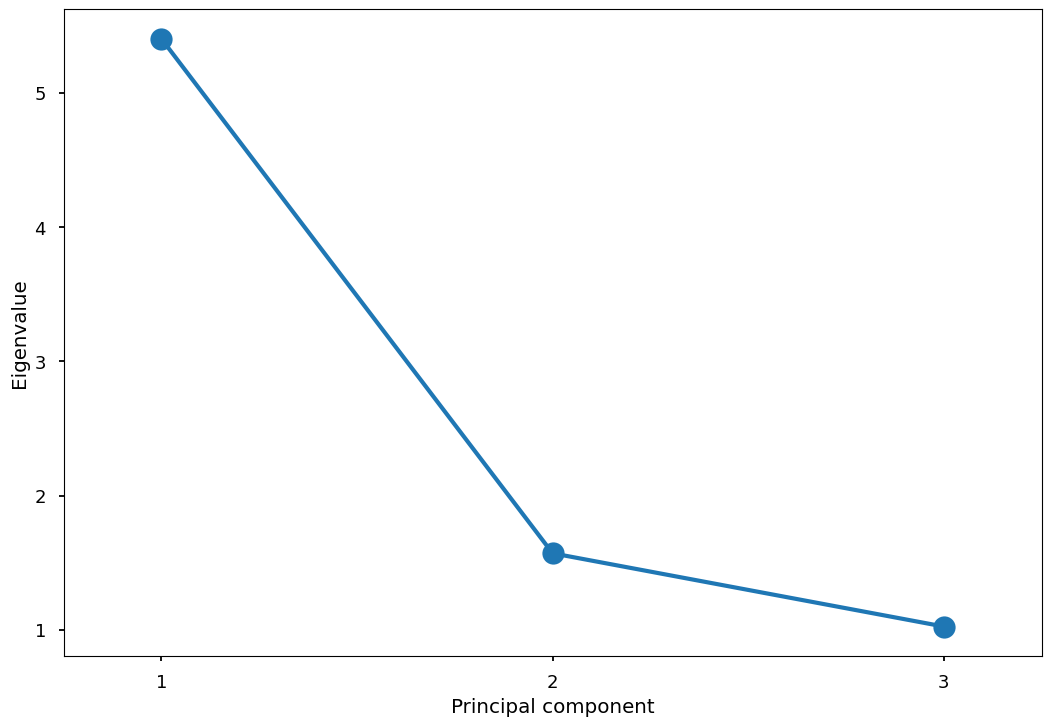

In [42]:
from psynlig import pca_scree
plt.style.use('seaborn-talk')

pca_scree(pca, marker='o', markersize=16, lw=3)

([<Figure size 1040x715 with 1 Axes>],
 [<Axes: title={'center': 'Loading coefficients for PC1'}, xlabel='Variables', ylabel='Coefficient'>])

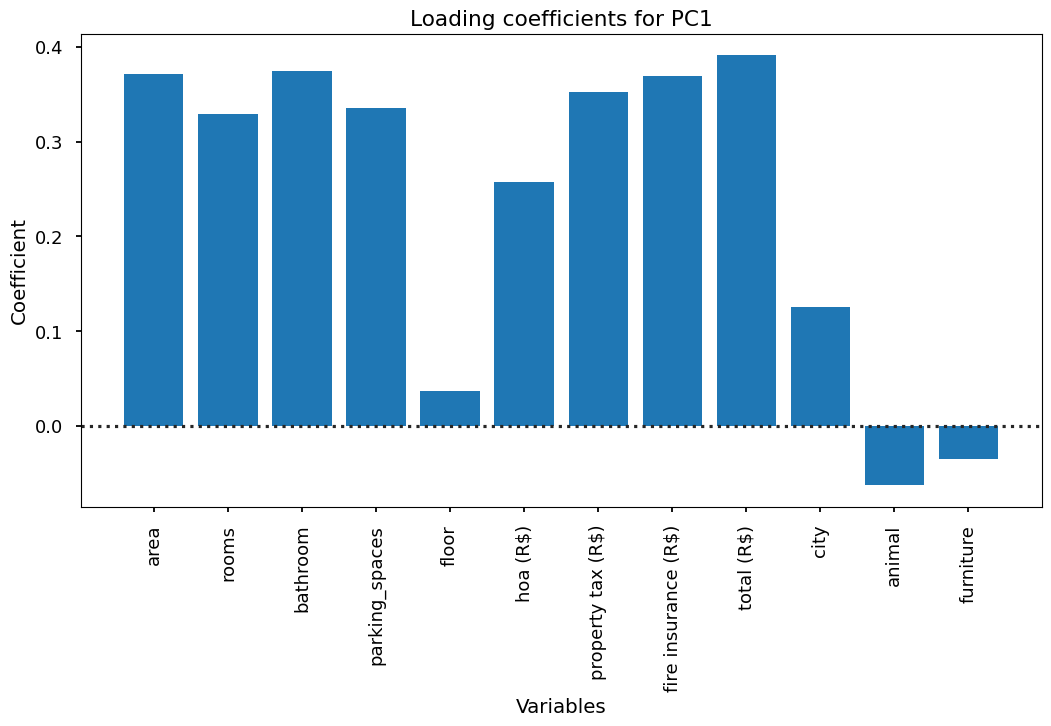

In [43]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from psynlig import (
    pca_explained_variance,
    pca_residual_variance,
    pca_explained_variance_bar,
    pca_explained_variance_pie,
    pca_1d_loadings,
    pca_2d_loadings,
    pca_2d_scores
)
pca_1d_loadings(
        pca,
        housesBrazil.columns,
        select_components={1},
        plot_type='bar',
    )

La primera componente del PCA se basa en el tamaño y podemos ver que las variables altamente correlacionadas con el area aumentarán bastante el valor del componente 1. Solo se obtuvo dos valores negativos que disminuirán un poco el valor final de la componente.

([<Figure size 1040x715 with 1 Axes>],
 [<Axes: title={'center': 'Loading coefficients for PC2'}, xlabel='Variables', ylabel='Coefficient'>])

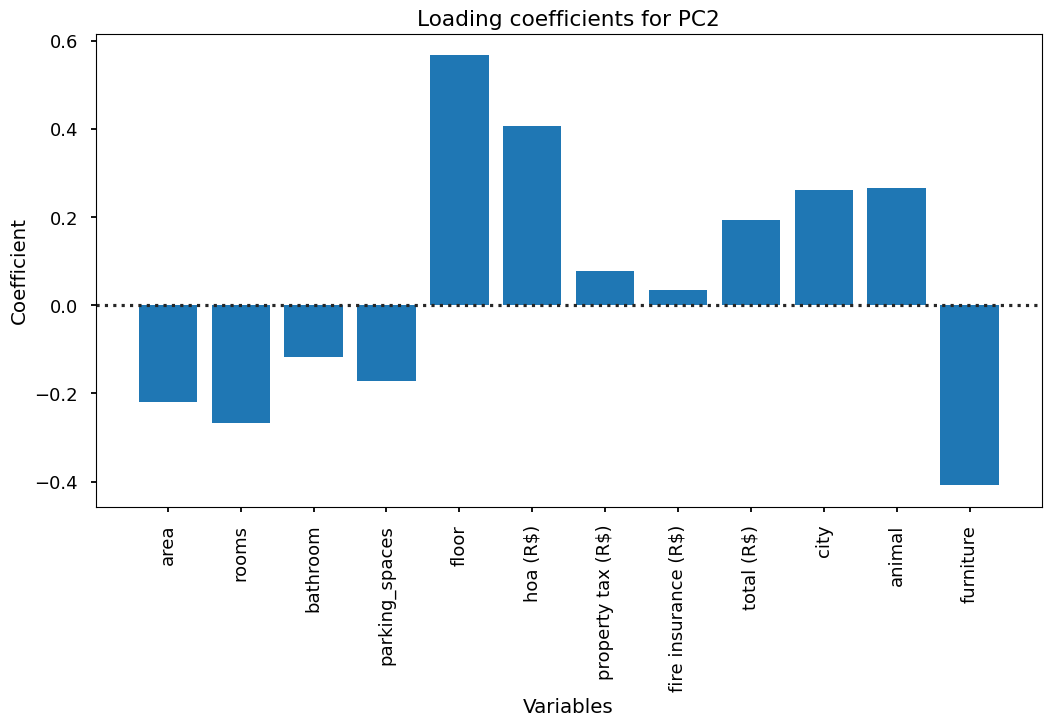

In [44]:
pca_1d_loadings(
        pca,
        housesBrazil.columns,
        select_components={2},
        plot_type='bar',
    )

La segunda componente se centra mas en las variables categóricas que tendrán un aumento considerable al final de la suma.

([<Figure size 1040x715 with 1 Axes>],
 [<Axes: title={'center': 'Loading coefficients for PC3'}, xlabel='Variables', ylabel='Coefficient'>])

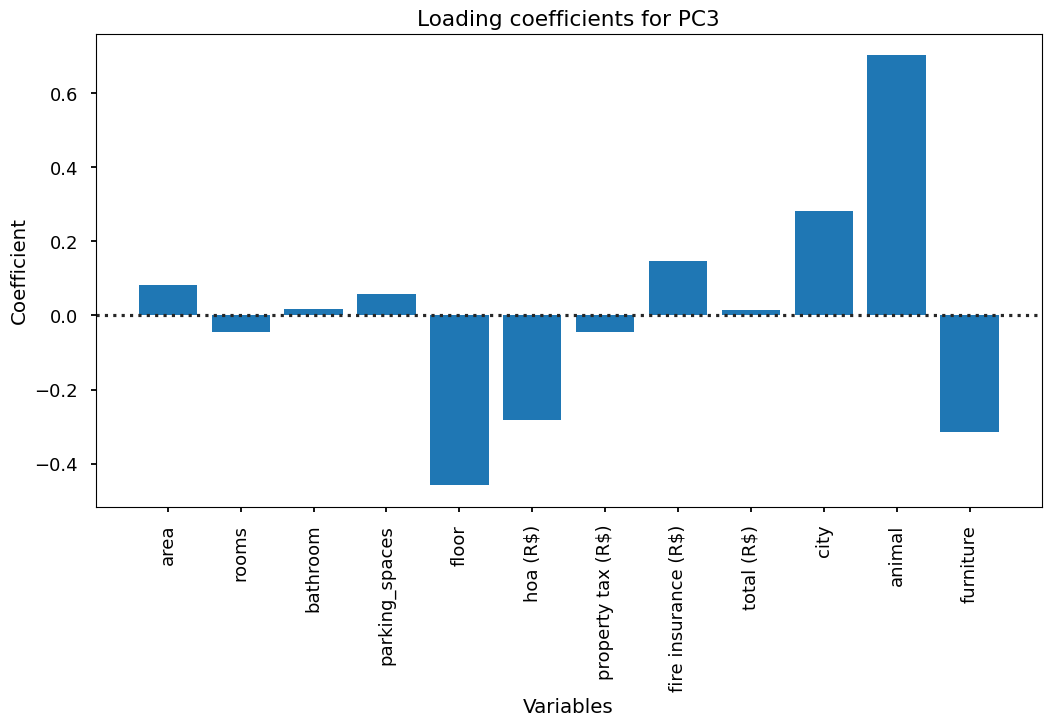

In [45]:
pca_1d_loadings(
        pca,
        housesBrazil.columns,
        select_components={3},
        plot_type='bar',
    )

El tercer componente se centra en el piso y animales